In [1]:
#Importing following libraries

In [2]:
import numpy as np 
import pandas as pd 
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
#Importing the data
df = pd.read_csv(r"C:\Users\user\Dropbox\PC\Desktop\Machine Learning\Relecura\dataset_4.csv")

In [4]:
df.head()

,Title,Abstract,First Claim,Target
0,Geophysical deep learning,A method can include selecting a type of geoph...,1. A method comprising:\nselecting a type of g...,Deep learning
1,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1. A computer-implemented method of automated ...,Deep learning
2,Modular deep learning model,The technology described herein uses a modular...,1. An automatic speech recognition (ASR) syste...,Deep learning
3,Deep learning processing of video,A method and system for processing multiple fr...,1. A method comprising:\nperforming a first pr...,Deep learning
4,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1. A method comprising:\ninitializing a neural...,Deep learning


In [5]:
#checking for null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        200 non-null    object
 1   Abstract     200 non-null    object
 2   First Claim  200 non-null    object
 3   Target       200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


# there is no null values

In [6]:
df.shape

(200, 4)

In [7]:
pd.DataFrame(df.Target.unique()).values

array([['Deep learning'],
       ['Machine learning'],
       ['Neural network'],
       ['Support vector machine']], dtype=object)

In [8]:
df.rename(columns = {'First Claim':'First_Claim'}, inplace = True)

In [9]:
df2 = df.sample(200, random_state=1).copy()

In [10]:
df2['category_id'] = df2['Target'].factorize()[0]
category_id_df = df2[['Target', 'category_id']].drop_duplicates()


category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Target']].values)

df2.head()

,Title,Abstract,First_Claim,Target,category_id
58,Hardware accelerated machine learning,A machine learning hardware accelerator archit...,1. A system to perform hardware acceleration f...,Machine learning,0
40,Integrated deep learning and clinical image vi...,Integrated deep learning and clinical image vi...,1. A method comprising:\nreceiving a clinical ...,Deep learning,1
34,Deep Learning Training System,Training large neural network models by provid...,1. A system comprising:\na computer-readable m...,Deep learning,1
102,Training a neural network using another neural...,"In an example embodiment, a first DCNN is trai...",1. A computerized method of training and utili...,Neural network,2
184,Q-METRIC BASED SUPPORT VECTOR MACHINE,A Support Vector Machine ( 110 ) with a Q-Metr...,1. A pattern recognition system comprising:\na...,Support vector machine,3


Text(0.5, 0, 'Number of ocurrences')

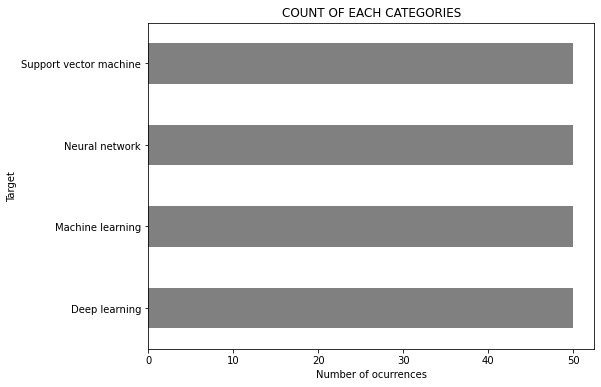

In [11]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','darkblue','darkblue','darkblue']
df.groupby('Target').Target.count().sort_values().plot.barh(ylim=0, color=colors, title= 'COUNT OF EACH CATEGORIES')
plt.xlabel('Number of ocurrences', fontsize = 10)

# number of occurences are same for each target 

In [12]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')


features = tfidf.fit_transform(df.Abstract).toarray()

labels = df.First_Claim

print("Each of the %d Text is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 200 Text is represented by 392 features (TF-IDF score of unigrams and bigrams)


In [13]:
N = 3
for Outcome, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Outcome))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Deep learning:
  * Most Correlated Unigrams are: fed, features, weights
  * Most Correlated Bigrams are: feature vectors, generate output, feature vector

==> Machine learning:
  * Most Correlated Unigrams are: fed, features, weights
  * Most Correlated Bigrams are: feature vectors, generate output, feature vector

==> Neural network:
  * Most Correlated Unigrams are: fed, features, weights
  * Most Correlated Bigrams are: feature vectors, generate output, feature vector

==> Support vector machine:
  * Most Correlated Unigrams are: fed, features, weights
  * Most Correlated Bigrams are: feature vectors, generate output, feature vector


# splitting into x and y
20% for y and 80 for x

In [14]:
x = df2['Abstract']
y = df2['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

In [15]:
y.shape

(200,)

In [16]:
y

58           Machine learning
40              Deep learning
34              Deep learning
102            Neural network
184    Support vector machine
                ...          
133            Neural network
137            Neural network
72           Machine learning
140            Neural network
37              Deep learning
Name: Target, Length: 200, dtype: object

In [17]:
vect=CountVectorizer(min_df=5).fit(x_train)
names=np.array(vect.get_feature_names())
x_train_trans=vect.transform(x_train)

In [18]:
x_train_trans=vect.transform(x_train)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
vect=CountVectorizer(min_df=5).fit(x_train)
names=np.array(vect.get_feature_names())
x_train_trans=vect.transform(x_train)

# Model building and evaluation

In [20]:
model = LogisticRegression(C=1)
model.fit(x_train_trans, y_train)
from sklearn import metrics
predict=model.predict(vect.transform(x_test))
print('roc_auc_score {:.2%}'.format(metrics.accuracy_score(y_test,predict)))

roc_auc_score 72.00%


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
